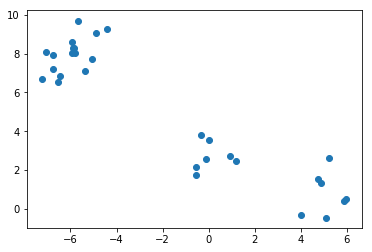

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

np.random.seed(5)
points, classes = make_blobs(n_features=2, n_samples=2*15, centers=4)
X, Y = np.dstack(points)[0]
plt.scatter(X, Y)
plt.show()

In [121]:
class KMeansShift():
    def __init__(self, K):
        self.k = K
        
    
    @classmethod
    def plot(self, X, Y, cent_x, cent_y):
        plt.scatter(X, Y, label='data points', color='blue')
        plt.scatter(cent_x, cent_y, color='yellow', label='centroids')
        plt.legend()
        plt.show()
        plt.close()
        
    
    @classmethod
    def error(self, points, centroids):
        err = 0
        for point in points:
            classification = np.argmin([np.linalg.norm(point-centroid) for centroid in centroids])
            err += (point-centroids[classification])**2
        return sum(err)
    
    
    def fit(self, X, Y, trials=2):
                
        trial_results = []
        trial_errors = []
        
        for trial in range(trials):
            centroids = np.random.randint(0, 256, (self.k, 2))
            prev_centroids = [-1]

            while(not all(item == True for item in (prev_centroids == centroids).flatten())):
                prev_centroids = centroids.copy()
                new_centroids = np.zeros((self.k, 2))
                num_neighbors = np.zeros(self.k)

                for i in range(len(X)):
                    distances = [np.linalg.norm(centroid-np.array([X[i], Y[i]])) for centroid in centroids]
                    min_index = np.argmin(distances)
                    new_centroids[min_index] += [X[i], Y[i]]
                    num_neighbors[min_index] += 1

                for i in range(len(new_centroids)):
                    if num_neighbors[i] != 0:
                        new_centroids[i] /= num_neighbors[i]

                centroids = new_centroids
                
            trial_results.append(centroids)
            trial_errors.append(self.error(np.dstack((X, Y))[0], centroids))
        return trial_results[np.argmin(trial_errors)]

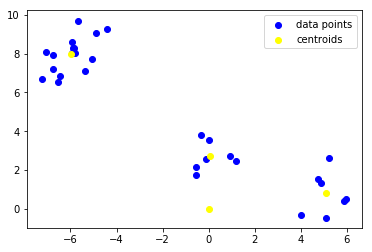

In [122]:
kmeans = KMeansShift(4)
centroids = kmeans.fit(X, Y, 1)
cent_x, cent_y = np.dstack(centroids)[0]
kmeans.plot(X, Y, cent_x, cent_y) 